In [0]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [23]:
#Read training data file

trainfile = r'/gdrive/My Drive/CIS 508 Python/Assignment-5/Sales_Transactions_Dataset_Weekly.csv'
trainData = pd.read_csv(trainfile)

# copy of train data and test data to perform pre processing
cpy_traindata = trainData.copy()
trainData.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,...,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,...,0.72,0.33,0.33,0.33,0.61,0.33,0.00,0.50,0.11,0.44,0.22,0.50,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.50,0.17,0.11,0.61,0.39,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,...,0.60,0.20,0.00,0.60,0.20,0.70,0.70,0.90,0.40,0.70,0.20,0.40,0.50,0.30,0.50,0.80,0.50,0.50,0.30,0.10,0.30,0.20,0.30,1.00,0.50,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,...,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.00,0.18,0.00,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,...,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.00,0.24,0.29,0.00,0.18,0.59,0.18,1.00,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,...,0.33,0.07,0.67,0.33,0.47,0.80,0.20,0.67,0.53,0.20,0.47,0.40,0.33,0.60,0.33,0.40,0.67,0.00,0.13,0.00,0.13,0.13,0.40,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [4]:
print("Training Data shape:",trainData.shape)
print("Training Data types:",trainData.dtypes)
# variable data types
trainData.describe()

Training Data shape: (811, 107)
Training Data types: Product_Code      object
W0                 int64
W1                 int64
W2                 int64
W3                 int64
                  ...   
Normalized 47    float64
Normalized 48    float64
Normalized 49    float64
Normalized 50    float64
Normalized 51    float64
Length: 107, dtype: object


,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,...,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.00000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,9.790382,9.678175,9.827374,9.686806,9.907522,10.045623,10.033292,9.905055,10.007398,9.644883,9.849568,9.710234,9.902589,9.861899,10.166461,8.892725,6.950678,7.193588,7.383477,7.339088,7.607891,7.610358,7.759556,7.906289,7.992602,7.997534,8.014797,8.073983,8.251541,7.965475,...,0.338878,0.331591,0.355771,0.344821,0.335919,0.345253,0.354994,0.330210,0.340271,0.353551,0.366017,0.370629,0.417694,0.389618,0.207596,0.223046,0.229605,0.224365,0.240493,0.250395,0.248323,0.259371,0.262256,0.268903,0.270173,0.273144,0.277497,0.264994,0.286375,0.279396,0.299149,0.287571,0.304846,0.316017,0.334760,0.314636,0.33815,0.358903,0.373009,0.427941
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,13.577685,13.007548,13.366525,13.214865,13.389975,13.743655,13.890316,13.364486,13.560015,13.129259,13.473781,12.827964,13.003290,12.617572,12.298777,10.016879,9.449151,9.729464,10.187970,10.161884,10.600332,10.390931,10.714137,10.838140,10.824638,10.773653,10.950947,10.854683,11.272094,10.758691,...,0.299536,0.289895,0.300587,0.312811,0.301809,0.302416,0.299286,0.297747,0.299420,0.294376,0.304491,0.303188,0.315159,0.323586,0.214272,0.226805,0.229479,0.229580,0.235536,0.248798,0.237675,0.247164,0.248657,0.249708,0.257877,0.248350,0.253397,0.246666,0.262363,0.253084,0.266993,0.256630,0.263396,0.262226,0.275203,0.266029,0.27569,0.286665,0.295197,0.342360
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [0]:
# check if there are any missing values in any column
print("Number of null values in train data",trainData.isnull().sum().sum())

Number of null values in train data 0


In [42]:
#using only normalised values from training data
required_columns = [col for col in trainData.columns if "Normalized" in col]
trainData_new = trainData[required_columns]
product_code = trainData["Product_Code"]
trainData_new.head()
print("Shape of training data with only normalized columns:" ,trainData_new.shape)

Shape of training data with only normalized columns: (811, 52)


# K Means clustering

In [9]:
# using default k means with 8 clusters
kmeans_model = KMeans()
kmeans_model.fit(trainData_new)
print("Silhouette score for clustering:",   silhouette_score(trainData_new, kmeans_model.labels_))
print("Sum of squared distances for clustering:", kmeans_model.inertia_)

Silhouette score for clustering: 0.04161917200714276
Sum of squared distances for clustering: 2089.6171117859985


In [0]:
#Finding optimal value for number of clusters -k
Sum_of_squared_distances = []
sil_mat = []
K = range(2,70)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model = kmeans_model.fit(trainData_new)
    Sum_of_squared_distances.append(kmeans_model.inertia_)
    sil_mat.append(silhouette_score(trainData_new, kmeans_model.labels_))

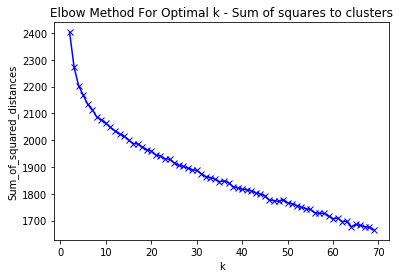

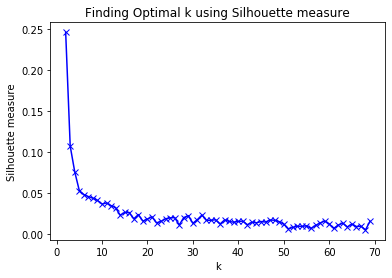

In [8]:
#Plot elbow curve using sum of sqaures
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k - Sum of squares to clusters')
plt.show()

#Plot elbow curve using silhouette measure
plt.plot(K, sil_mat, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette measure')
plt.title('Finding Optimal k using Silhouette measure')
plt.show()

In [28]:
# using k means with clusters =2
kmeans_model = KMeans(n_clusters= 2)
kmeans_model.fit(trainData_new)
print("Silhouette score for clustering:",   silhouette_score(trainData_new, kmeans_model.labels_))
print("Sum of squared distances for clustering:", kmeans_model.inertia_)

Silhouette score for clustering: 0.24637060375945008
Sum of squared distances for clustering: 2402.669678646214


In [49]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
#Add Cluster Number to each datapoint + save file
df_kmeans=trainData_new
kmeans_predict_train=kmeans_model.predict(trainData_new)

df_kmeans['Cluster_Number']=kmeans_predict_train
df_kmeans['Product_Code'] = product_code
print(df_kmeans.shape)
df_kmeans.head()
export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS 508 Python/Assignment-5/KmeansClusters_2.csv')

(811, 54)


# Agglomerative Hirearchial clustering

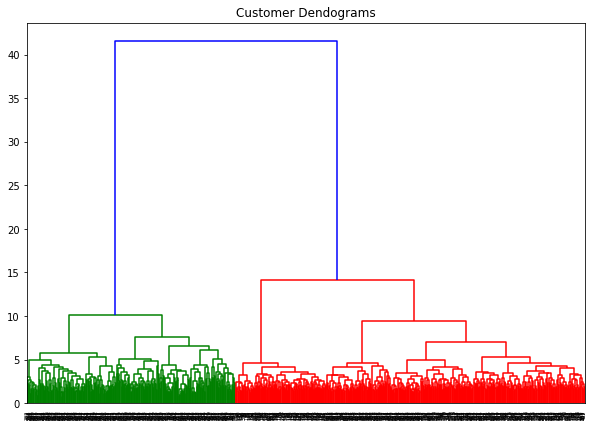

In [43]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(trainData_new, method='ward'))

In [44]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(trainData_new)
print("Silhouette score for clustering:", silhouette_score(trainData_new, cluster.fit_predict(trainData_new)))

Silhouette score for clustering: 0.24625996406892794


# PCA and Then Kmeans

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(trainData_new)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [46]:
# using default k means 
kmeans_model = KMeans(n_clusters= 2, init='k-means++', n_jobs = -1)
kmeans_model.fit(principalDf)
print("Silhouette score for clustering:",   silhouette_score(principalDf, kmeans_model.labels_))
print("Sum of squared distances for clustering:", kmeans_model.inertia_)

Silhouette score for clustering: 0.599992827302872
Sum of squared distances for clustering: 359.2476058189002


In [0]:
#Finding optimal value for number of clusters -k
Sum_of_squared_distances = []
sil_mat = []
K = range(2,70)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model = kmeans_model.fit(principalDf)
    Sum_of_squared_distances.append(kmeans_model.inertia_)
    sil_mat.append(silhouette_score(principalDf, kmeans_model.labels_))

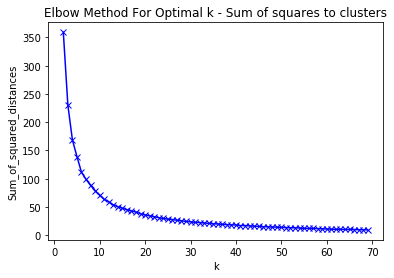

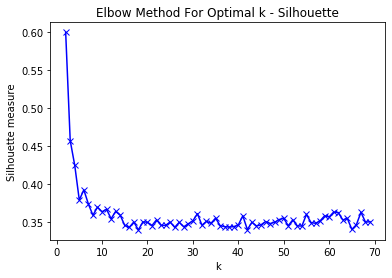

In [0]:
#Plot elbow curve using sum of sqaures
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k - Sum of squares to clusters')
plt.show()

#Plot elbow curve using silhouette measure
plt.plot(K, sil_mat, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette measure')
plt.title('Elbow Method For Optimal k - Silhouette')
plt.show()

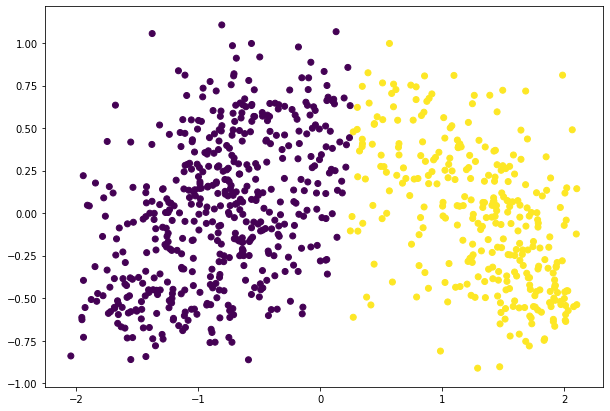

In [47]:
plt.figure(figsize=(10, 7))  
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=kmeans_model.labels_) 

In [0]:
#Add Cluster Number to each datapoint + save file
df_kmeans=trainData_new
kmeans_predict_train=kmeans_model.predict(principalDf)

df_kmeans['Cluster Number']=kmeans_predict_train
df_kmeans['Product_Code'] = product_code
print(df_kmeans.shape)
df_kmeans.head()
print(kmeans_model.labels_)
#export_csv = df_kmeans.to_csv(r'/gdrive/My Drive/CIS 508 Python/Assignment-5/KmeansClusters_pca_15.csv')

(811, 54)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 

# DBSCAN

In [48]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(metric = "kulsinski", min_samples= 5, leaf_size = 20)
clustering.fit(trainData_new)
print(clustering.labels_)
print("Silhouette score for clustering:",   silhouette_score(trainData_new, clustering.labels_))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0
  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1
 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0